In [34]:
from PIL import Image
import numpy as np
from numpy import asarray, load
from matplotlib import pyplot as plt
import pandas as pd
import os

In [2]:
label = pd.read_csv('train_labels.csv', names=['sex', 'mood'])
with load('train_data.npz') as f:
    data = f['data']
print('>> Shape of data: ', data.shape)
print('>> Shape of label: ', label.shape)

Shape of data:  (6000, 128, 128, 4)
Shape of label:  (6000, 2)


In [3]:
# Multilabel vectorizer
label['combine'] = list(zip(label['sex'], label['mood']))
from sklearn.preprocessing import MultiLabelBinarizer
labels = label['combine'].unique()
mlb = MultiLabelBinarizer()
mlb = mlb.fit(labels)
y = mlb.transform(label['combine']) #OHE multilabels

In [4]:
# Train-test split
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, y, test_size=0.2, random_state=42)

In [5]:
'''
# Get Dataset

import requests
def get_svg(sex, mood, seed):
    url = 'https://avatars.dicebear.com/api/'+sex+'/'+seed+'.svg?mood[]='+mood
    response = requests.get(url)
    filename = sex+'_'+mood+'_'+seed+'.svg'
    file1 = open(filename,"w") 
    file1.write(response.content.decode('utf-8'))
    file1.close()
    return url
for sex in ['male', 'female']:
    for mood in ['happy', 'sad', 'surprised']:
        for i in range(1000):
            get_svg(sex, mood, str(i))
            print(sex, mood, str(i))'''

'\n# Get Dataset\n\nimport requests\ndef get_svg(sex, mood, seed):\n    url = \'https://avatars.dicebear.com/api/\'+sex+\'/\'+seed+\'.svg?mood[]=\'+mood\n    response = requests.get(url)\n    filename = sex+\'_\'+mood+\'_\'+seed+\'.svg\'\n    file1 = open(filename,"w") \n    file1.write(response.content.decode(\'utf-8\'))\n    file1.close()\n    return url\nfor sex in [\'male\', \'female\']:\n    for mood in [\'happy\', \'sad\', \'surprised\']:\n        for i in range(1000):\n            get_svg(sex, mood, str(i))\n            print(sex, mood, str(i))'

In [6]:
'''
# Convert SVG to PNG

import os, sys
import cairosvg
path = 'D:/DS/dicebear-avatar-multilabel/'
for i in ['female_happy',
 'female_sad',
 'female_surprised',
 'male_happy',
 'male_sad',
 'male_surprised']:
    os.chdir(path+i)
    for file in os.listdir('.'):
        name = file.split('.svg')[0]
        cairosvg.svg2png(url=name+'.svg',
                 parent_width=128,
                 parent_height=128,
                 write_to=name+'.png') 

os.chdir(path)
os.listdir('.')'''

"\n# Convert SVG to PNG\n\nimport os, sys\nimport cairosvg\npath = 'D:/DS/dicebear-avatar-multilabel/'\nfor i in ['female_happy',\n 'female_sad',\n 'female_surprised',\n 'male_happy',\n 'male_sad',\n 'male_surprised']:\n    os.chdir(path+i)\n    for file in os.listdir('.'):\n        name = file.split('.svg')[0]\n        cairosvg.svg2png(url=name+'.svg',\n                 parent_width=128,\n                 parent_height=128,\n                 write_to=name+'.png') \n\nos.chdir(path)\nos.listdir('.')"

In [7]:
'''
# Export training data to CSV
lst = []
path = 'D:/DS/dicebear-avatar-multilabel/'
for i in ['female_happy',
 'female_sad',
 'female_surprised',
 'male_happy',
 'male_sad',
 'male_surprised']:
    os.chdir(path+i)
    for file in os.listdir('.'):
        if '.png' in file:
            image = Image.open(file)
            lst.append(asarray(image))
os.chdir(path)            
from numpy import savez_compressed
savez_compressed('train_data.npz', data=lst)

sex = ['female']*3000 + ['male']*3000
mood = ['happy']*1000 + ['sad']*1000 + ['surprised']*1000 + ['happy']*1000 + ['sad']*1000 + ['surprised']*1000
pd.DataFrame(zip(sex, mood)).to_csv('train_labels.csv',header=None,index=None)'''

"\n# Export training data to CSV\nlst = []\npath = 'D:/DS/dicebear-avatar-multilabel/'\nfor i in ['female_happy',\n 'female_sad',\n 'female_surprised',\n 'male_happy',\n 'male_sad',\n 'male_surprised']:\n    os.chdir(path+i)\n    for file in os.listdir('.'):\n        if '.png' in file:\n            image = Image.open(file)\n            lst.append(asarray(image))\nos.chdir(path)            \nfrom numpy import savez_compressed\nsavez_compressed('train_data.npz', data=lst)\n\nsex = ['female']*3000 + ['male']*3000\nmood = ['happy']*1000 + ['sad']*1000 + ['surprised']*1000 + ['happy']*1000 + ['sad']*1000 + ['surprised']*1000\npd.DataFrame(zip(sex, mood)).to_csv('train_labels.csv',header=None,index=None)"

In [8]:
# import the necessary packages
import tensorflow as tf
from tensorflow import keras

In [25]:
class SmallerVGGNet:
    @staticmethod
    def build(width, height, depth, classes, finalAct="sigmoid"):
        model = tf.keras.Sequential(name='cnn_smallerVGGNet')
        inputShape = (height, width, depth)
        chanDim = -1
        
        # CONV => RELU => POOL
        model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same",
                         input_shape=inputShape))
        model.add(tf.keras.layers.Activation("relu"))
        model.add(tf.keras.layers.BatchNormalization(axis=chanDim))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
        model.add(tf.keras.layers.Dropout(0.25))
        
        # (CONV => RELU) * 2 => POOL
        model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same"))
        model.add(tf.keras.layers.Activation("relu"))
        model.add(tf.keras.layers.BatchNormalization(axis=chanDim))
        model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same"))
        model.add(tf.keras.layers.Activation("relu"))
        model.add(tf.keras.layers.BatchNormalization(axis=chanDim))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model.add(tf.keras.layers.Dropout(0.25))

        # (CONV => RELU) * 2 => POOL
        model.add(tf.keras.layers.Conv2D(128, (3, 3), padding="same"))
        model.add(tf.keras.layers.Activation("relu"))
        model.add(tf.keras.layers.BatchNormalization(axis=chanDim))
        model.add(tf.keras.layers.Conv2D(128, (3, 3), padding="same"))
        model.add(tf.keras.layers.Activation("relu"))
        model.add(tf.keras.layers.BatchNormalization(axis=chanDim))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model.add(tf.keras.layers.Dropout(0.25))
        
        # first (and only) set of FC => RELU layers
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(1024))
        model.add(tf.keras.layers.Activation("relu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(0.5))
        
        # use a *softmax* activation for single-label classification
        # and *sigmoid* activation for multi-label classification
        model.add(tf.keras.layers.Dense(classes))
        model.add(tf.keras.layers.Activation(finalAct))
        
        # return the constructed network architecture
        return model

In [10]:
# initialize the number of epochs, initial learning rate, batch size, and image dimensions
EPOCHS = 25
INIT_LR = 1e-3
BS = 50
IMAGE_DIMS = (128, 128, 4)
CLASSES = 5 # male, female, happy, surprised, sad

In [26]:
model = SmallerVGGNet.build(
    width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
    depth=IMAGE_DIMS[2], classes=CLASSES,
    finalAct="sigmoid")

# initialize the optimizer
opt = tf.keras.optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

model.compile(loss="binary_crossentropy", optimizer=opt,
              metrics=["accuracy"])

model.summary()

Model: "cnn_smallerVGGNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 32)      1184      
_________________________________________________________________
activation_7 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 42, 42, 64)  

In [12]:
if os.path.isfile('model.h5') == False:
    # Set random seed for shuffling
    np.random.seed(7)

    # Train model
    model.fit(trainX, trainY, epochs=1, batch_size=BS, shuffle=True, verbose=1)

    # Save model
    with open("model.json", "w") as json_file:
        json_file.write(model.to_json())
        
    # Save weights
    model.save_weights("model.h5")
else:
    # Load pre-trained weight
    model.load_weights('model.h5')

In [13]:
def predict(model, test):
    probs = model.predict(tf.cast(test, tf.float32))
    preds = []
    for i in np.argsort(probs)[:,[-2,-1]]:
        preds.append(set(mlb.classes_[i]))
    return preds

def accuracy(y_test, pred):
    test = [set(i) for i in mlb.inverse_transform(y_test)]
    correct = 0
    total = 0
    for i, j in zip(pred, test):
        if i==j:
            correct += 1
        total += 1
    return float(correct)/float(total)

In [14]:
#preds = predict(model, testX)
#accuracy(testY, preds)

female sad
[{'female', 'sad'}]


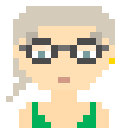

In [15]:
import cairosvg
import requests
import random

def test(sex, mood, seed):
    url = 'https://avatars.dicebear.com/api/'+sex+'/'+str(seed)+'.svg?mood[]='+mood

    cairosvg.svg2png(bytestring=requests.get(url).content,
                           parent_width=128,
                           parent_height=128,
                           write_to='test.png') 
    image = Image.open('test.png')
    inp = np.reshape(asarray(image), (1,128,128,4))
    print(sex, mood)
    print(predict(model, asarray(inp)))
    return image

SEX = ['male', 'female']
MOOD = ['sad', 'happy', 'surprised']

test(sex=random.choice(SEX),
     mood=random.choice(MOOD),
     seed=random.random())

# GAN

In [50]:
class GAN():
    def __init__ (self, width, height, depth):
        # Init
        self.inputShape = (height, width, depth)
        self.latentDim = 100
        optimizer = tf.keras.optimizers.Adam(0.0002, 0.5)
        
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        self.discriminator.trainable = False
        
        self.generator = self.build_generator()
        with open("gan_generator.json", "w") as json_file:
            json_file.write(self.generator.to_json()) 
        
        z = tf.keras.Input(shape=(self.latentDim,))
        img = self.generator(z)
        validity = self.discriminator(img)
        self.combined = tf.keras.Model(z, validity) # The combined adversarial model
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    def build_generator(self):
        model = tf.keras.Sequential(name='gan_generator')
        model.add(tf.keras.layers.Dense(256, input_dim=self.latentDim))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
        model.add(tf.keras.layers.Dense(512))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
        model.add(tf.keras.layers.Dense(1024))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
        model.add(tf.keras.layers.Dense(np.prod(self.inputShape), activation='tanh'))
        model.add(tf.keras.layers.Reshape(self.inputShape))
        model.summary()
        noise = tf.keras.Input(shape=(self.latentDim,))
        img = model(noise)
        return tf.keras.Model(noise, img)
    
    def build_discriminator(self):
        model = tf.keras.Sequential(name='gan_discriminator')
        model.add(tf.keras.layers.Flatten(input_shape=self.inputShape))
        model.add(tf.keras.layers.Dense(512))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        model.add(tf.keras.layers.Dense(256))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.summary()
        img = tf.keras.Input(shape=self.inputShape)
        validity = model(img)
        return tf.keras.Model(img, validity)
    
    def train(self, X_train, epochs=EPOCHS, batch_size=BS, sample_interval=50):
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        for epoch in range(epochs):
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            noise = np.random.normal(0, 1, (batch_size, self.latentDim))
            gen_imgs = self.generator.predict(noise)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            g_loss = self.combined.train_on_batch(noise, valid)
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            
            if epoch % sample_interval == 0:
                self.sample_images(epoch) # Print 25 images every sample interval
                self.generator.save_weights("gan_generator.h5") # Save updated weights every sample interval
    
    def generate(self, load_weight=True):
        if load_weight:
            self.generator.load_weights("gan_generator.h5") # Load pre-trained weights
        self.sample_images('final_model')
    
    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latentDim))
        gen_imgs = self.generator.predict(noise)
        gen_imgs = 0.5 * gen_imgs + 0.5
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images_"+str(epoch)+".png") # Save images
        plt.close()

Model: "gan_discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 65536)             0         
_________________________________________________________________
dense_91 (Dense)             (None, 512)               33554944  
_________________________________________________________________
leaky_re_lu_62 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_63 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 257       
Total params: 33,686,529
Trainable params: 33,686,529
Non-trainable params: 0
_____________________________________

In [51]:
gan = GAN(width=IMAGE_DIMS[1], height=IMAGE_DIMS[0], depth=IMAGE_DIMS[2])

0 [D loss: 0.352376, acc.: 58.00%] [G loss: 1.088141]


In [52]:
#gan.train(X_train=data, epochs=1)
#gan.generate()